## Project Overview: 

#### Objective:

The goal of this project is to practice my analysis skills on a dataset. I will be exploring trends in nfl RB statistics over the past 5 seasons. 

#### Key Questions
1. How has the average rushing yards per game changed over the last 5 Seasons? 
2. How has the ratio of rushing yards between QB and RB changed? 
3. Is there a relationship between RB rushing attempts and points scored?  

### Setup

In [1]:
# Import the neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data from the CSV file
nfl_df = pd.read_csv('../data/nfl_weekly_data.csv')

In [3]:
nfl_df

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
0,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2020,1,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,20.46,20.46
1,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2020,2,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,8.68,8.68
2,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2020,3,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,23.88,23.88
3,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2020,4,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,32.46,32.46
4,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2020,5,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,14.12,14.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28021,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,10,REG,...,2.0,1.987017,0,-3.125,0.083333,-0.072072,0.074550,0.0,8.70,10.70
28022,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,12,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,1.80,1.80
28023,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,13,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,2.00,2.00
28024,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,14,REG,...,0.0,-0.144496,0,-0.800,0.026316,-0.031847,0.017181,0.0,1.90,2.90


### Q1: How has the average rushing yards per game changed over the last 5 Seasons? 

#### Preparing the data

In [9]:
#Filter data to only show runningback stats for regular season games
rb_df = nfl_df[(nfl_df['position'] == 'RB') & 
               (nfl_df['season_type']== 'REG')].copy()

unique_rbs = rb_df['player_display_name'].unique()
print(f"Uniques RBs: {len(unique_rbs)}")

rb_df


Uniques RBs: 286


,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
118,00-0023500,F.Gore,Frank Gore,RB,RB,https://static.www.nfl.com/image/private/f_aut...,NYJ,2020,1,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,2.4,2.4
119,00-0023500,F.Gore,Frank Gore,RB,RB,https://static.www.nfl.com/image/private/f_aut...,NYJ,2020,2,REG,...,0.0,-1.385031,0,0.000000,0.062500,0.027778,0.113194,0.0,6.3,6.3
120,00-0023500,F.Gore,Frank Gore,RB,RB,https://static.www.nfl.com/image/private/f_aut...,NYJ,2020,3,REG,...,0.0,-0.052740,0,1.666667,0.038462,0.017544,0.069973,0.0,6.2,7.2
121,00-0023500,F.Gore,Frank Gore,RB,RB,https://static.www.nfl.com/image/private/f_aut...,NYJ,2020,4,REG,...,0.0,-1.718512,0,0.400000,0.046512,0.035047,0.094300,0.0,3.6,4.6
122,00-0023500,F.Gore,Frank Gore,RB,RB,https://static.www.nfl.com/image/private/f_aut...,NYJ,2020,5,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28021,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,10,REG,...,2.0,1.987017,0,-3.125000,0.083333,-0.072072,0.074550,0.0,8.7,10.7
28022,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,12,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,1.8,1.8
28023,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,13,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,2.0,2.0
28024,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,14,REG,...,0.0,-0.144496,0,-0.800000,0.026316,-0.031847,0.017181,0.0,1.9,2.9


In [26]:
rb_season_stats = rb_df.groupby(['season', 'week']).agg({
    #'week': 'count',
    #'carries': 'sum',  
    'rushing_yards': 'sum',
    'rushing_tds': 'sum', 
    "rushing_fumbles": 'sum',
    "rushing_fumbles_lost": 'sum',
    "rushing_first_downs": 'sum',
    "rushing_epa": 'sum'
}).reset_index()

rb_season_stats


,season,week,rushing_yards,rushing_tds,rushing_fumbles,rushing_fumbles_lost,rushing_first_downs,rushing_epa
0,2020,1,2925.0,28,7.0,2.0,169.0,-56.307106
1,2020,2,3427.0,27,5.0,3.0,176.0,-0.204969
2,2020,3,3003.0,22,4.0,4.0,162.0,-33.426721
3,2020,4,2667.0,23,3.0,2.0,160.0,-27.839389
4,2020,5,2611.0,19,1.0,0.0,130.0,-23.857406
...,...,...,...,...,...,...,...,...
84,2024,14,2429.0,23,2.0,1.0,130.0,-24.162706
85,2024,15,2838.0,15,7.0,5.0,153.0,-67.451231
86,2024,16,3082.0,30,8.0,5.0,161.0,-13.309852
87,2024,17,3029.0,13,3.0,2.0,162.0,-78.779325


Create additional metrics from the aggregated data

In [ ]:
#Average Yards Per Carry for each week = Total Rush Yards / Number of teams in the NFL 
rb_season_stats['avg_rush_yards_per_game'] = rb_season_stats['rushing_yards'] / 32
rb_season_stats


,season,week,rushing_yards,rushing_tds,rushing_fumbles,rushing_fumbles_lost,rushing_first_downs,rushing_epa,avg_rush_yards_per_game
0,2020,1,2925.0,28,7.0,2.0,169.0,-56.307106,91.40625
1,2020,2,3427.0,27,5.0,3.0,176.0,-0.204969,107.09375
2,2020,3,3003.0,22,4.0,4.0,162.0,-33.426721,93.84375
3,2020,4,2667.0,23,3.0,2.0,160.0,-27.839389,83.34375
4,2020,5,2611.0,19,1.0,0.0,130.0,-23.857406,81.59375
...,...,...,...,...,...,...,...,...,...
84,2024,14,2429.0,23,2.0,1.0,130.0,-24.162706,75.90625
85,2024,15,2838.0,15,7.0,5.0,153.0,-67.451231,88.68750
86,2024,16,3082.0,30,8.0,5.0,161.0,-13.309852,96.31250
87,2024,17,3029.0,13,3.0,2.0,162.0,-78.779325,94.65625


#### Analysis and visualizations

Visualizing the data with a line chart

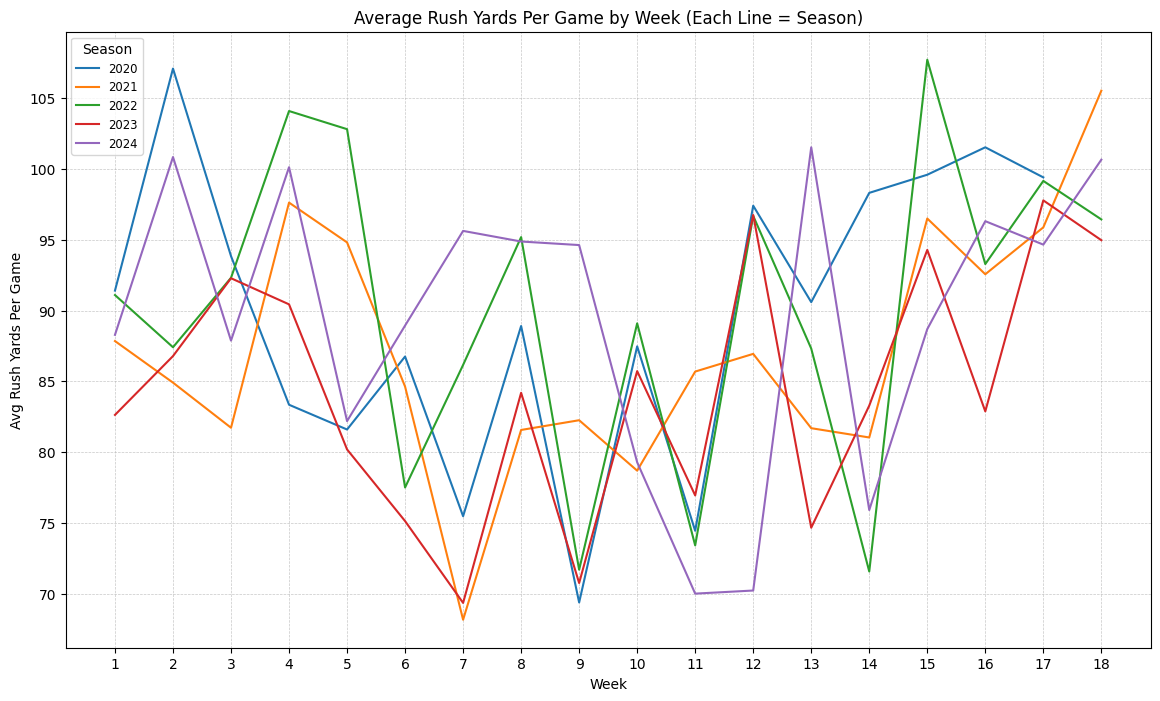

In [82]:
plt.figure(figsize=(14, 8))

sns.lineplot(
    data=rb_season_stats,
    x='week',
    y='avg_rush_yards_per_game',
    hue='season',
    palette='tab10', 
    markers=True,      
    dashes=False  
)

# Set x-axis ticks to every unique week value in your data
weeks = sorted(rb_season_stats['week'].unique())
plt.xticks(weeks, fontsize=10)

plt.yticks(fontsize=10)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

plt.xlabel('Week')
plt.ylabel('Avg Rush Yards Per Game')
plt.title('Average Rush Yards Per Game by Week (Each Line = Season)')
plt.legend(title='Season', loc='best', fontsize='small')

plt.show()


Line charts are good for showing trends over time. In this instance we can see that there is a consistent dip in average rushing yards per game by week for weeks 7, 9, and 14. 

Next we'll look at the central tendency, dispersion and shape of our dataset. We'll visualize this with a boxplot. 

Boxplots visually show the distributions and skewness of numerical data. They are often used in exploratory analysis to show center and spread of the data points. Compared to a lineplot that details information on the mean, boxplots give more information. 

Box plots: 
1. Min & Max 
2. Median
3. Lower & Upper Quartiles



In [87]:
summary = rb_season_stats.groupby('week')['avg_rush_yards_per_game'].describe()
summary


,count,mean,std,min,25%,50%,75%,max
week,,,,,,,,
1,5.0,88.250000,3.530420,82.62500,87.843750,88.281250,91.09375,91.40625
2,5.0,93.406250,9.934846,84.90625,86.781250,87.406250,100.84375,107.09375
3,5.0,89.606250,4.940792,81.71875,87.875000,92.281250,92.31250,93.84375
4,5.0,95.125000,8.253166,83.34375,90.437500,97.625000,100.12500,104.09375
5,5.0,88.318750,10.014647,80.18750,81.593750,82.187500,94.81250,102.81250
6,5.0,82.587500,5.986900,75.12500,77.500000,84.625000,86.75000,88.93750
7,5.0,78.950000,11.735521,68.15625,69.343750,75.468750,86.15625,95.62500
8,5.0,88.943750,6.149600,81.56250,84.187500,88.906250,94.87500,95.18750
9,5.0,77.737500,10.734400,69.37500,70.750000,71.687500,82.25000,94.62500


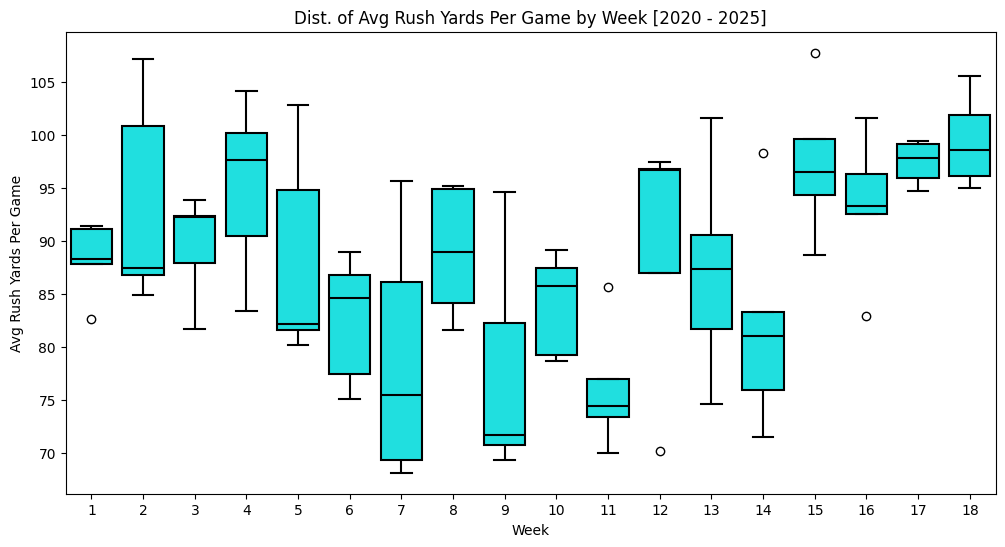

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=rb_season_stats,
    x='week',
    y='avg_rush_yards_per_game',
    color='cyan',
    # palette='tab10' # TOO MUCH COLOR BECOMES DISTRACTING
    linecolor='black',
    linewidth=1.5
)
plt.xlabel('Week')
plt.ylabel('Avg Rush Yards Per Game')
plt.title('Dist. of Avg Rush Yards Per Game by Week [2020 - 2025]')
#plt.tight_layout() # Looks better in my opinion
plt.show()


Insights: 

Week 1 has the lowest dispersion (std = 2.06) while week 7 had the highest (std = 11.7)


### Q2: How has the ratio of rushing yards between QB and RB changed? 

#### Prep the Data

#### Analysis and Visualization

### Q3: Is there a relationship between RB rushing attempts and points scored?

#### Prep the Data

#### Analysis and Visualization